# Ayudantía: Introducción al Machine Learning

## Librerías clave

Hay un sin número de librerías para trabajar en tareas de Machine Learning. Entre ellas las que usaremos son las siguientes:



* [numpy](https://numpy.org/doc/)
* [pandas](https://pandas.pydata.org/docs/)
* [matplotlib](https://matplotlib.org/stable/users/installing/index.html)
* [seaborn](https://seaborn.pydata.org/installing.html)
* [scikit-learn](https://scikit-learn.org/stable/install.html)

¡Es muy importante que se acostumbren a buscar en la documentación cuando haya algo que no entiendan respecto a las librerías!

Si están corriendo este notebook en colab, basta con importarlas. En caso de que quieran correr este notebook de forma local, pueden usar el comando ``pip install {librería}``.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Introducción a pandas 

Pandas es una de las librerías clave que vamos a usar a lo largo del curso. Es probablemente la librería más importante para el manejo de datos, ya que permite la manipulación de datos en tablas.

Permite una amplia variedad de formatos (como hojas de Excel, archivos separados por comas csv, texto plano, entre otros).

### Dataframes

Una tabla en pandas se representa a partir de los objetos de la clase ``DataFrame``.

Podemos construir DataFrames a partir de diferentes tipos de data: diccionarios, listas, matrices de numpy, Series (otra clase propia de pandas), entre otros.

Veamos un ejemplo. Supongamos que tenemos la información de la Edad, Peso y Tamaño de diferentes patos (sí, patos). Podríamos crear un DataFrame de la siguiente forma.

In [10]:
patos = pd.DataFrame([[13, 3.2, 24], [8, 2.1, 13], [5, 1.4, 8], [28, 4.1, 23]],
             index = ["Pato 1", "Pato 2", "Pato 3", "Pato 4"],
             columns = ["Edad", "Peso", "Tamaño"])

print("Veamos la info. de nuestros patos:")
display(patos) # hacemos uso de display ya que permite visualizar mejor la tabla dentro de un notebook

Veamos la info. de nuestros patos:


,Edad,Peso,Tamaño
Pato 1,13,3.2,24
Pato 2,8,2.1,13
Pato 3,5,1.4,8
Pato 4,28,4.1,23


Notar que indicamos la información de las filas, el nombre de los índices y los nombres de las columnas. La documentación indica muchas otras opciones que se pueden usar al momento de crear un DataFrame.

### Accediendo y filtrando los datos de un Dataframe

Bacán, tenemos nuestro lindo DataFrame con información de patitos. Ahora, ¿qué pasa si queremos acceder a información específica?

Bueno, hay varias cosas que podemos hacer:

In [13]:
## podemos acceder a una columna en específico
patos["Edad"]

Pato 1    13
Pato 2     8
Pato 3     5
Pato 4    28
Name: Edad, dtype: int64

In [16]:
## o a varias columnas al mismo tiempo, notar que entregamos una lista con las columnas
patos[["Edad", "Peso"]]

,Edad,Peso
Pato 1,13,3.2
Pato 2,8,2.1
Pato 3,5,1.4
Pato 4,28,4.1


In [17]:
## podemos acceder a un pato en específico por su index
patos.loc["Pato 1"]

Edad      13.0
Peso       3.2
Tamaño    24.0
Name: Pato 1, dtype: float64

In [18]:
## o podemos acceder al pato según la posición de su fila, en general esto es más rápido pero 
## a veces tiene más sentido usar loc ya que nombramos a los índices de alguna forma especial.
patos.iloc[0]

Edad      13.0
Peso       3.2
Tamaño    24.0
Name: Pato 1, dtype: float64

In [19]:
## Quizás queremos imponer alguna condición a los datos a mostrar:
patos["Edad"] > 6

Pato 1     True
Pato 2     True
Pato 3    False
Pato 4     True
Name: Edad, dtype: bool

In [21]:
## y solo mostrar la información de esos patos
patos.loc[patos["Edad"] > 6]

,Edad,Peso,Tamaño
Pato 1,13,3.2,24
Pato 2,8,2.1,13
Pato 4,28,4.1,23


In [22]:
## Podemos imponer múltiples condiciones usando & (AND) o | (OR)
patos.loc[(patos["Edad"] > 6) & (patos["Tamaño"] > 20)]

,Edad,Peso,Tamaño
Pato 1,13,3.2,24
Pato 4,28,4.1,23


### Ordenando datos en un DataFrame

Podemos ordenar los datos según alguna columna en particular (notar que esto crea un nuevo DataFrame, el original se mantiene igual):

In [25]:
patos.sort_values(by="Edad")

,Edad,Peso,Tamaño
Pato 3,5,1.4,8
Pato 2,8,2.1,13
Pato 1,13,3.2,24
Pato 4,28,4.1,23


In [26]:
patos # el dF original sigue igualito

,Edad,Peso,Tamaño
Pato 1,13,3.2,24
Pato 2,8,2.1,13
Pato 3,5,1.4,8
Pato 4,28,4.1,23


### Describiendo datos

Pandas tiene algunas funciones útiles para obtener estadísticos de nuestros datos

In [27]:
patos.describe()

,Edad,Peso,Tamaño
count,4.000000,4.000000,4.000000
mean,13.500000,2.700000,17.000000
std,10.214369,1.191638,7.788881
min,5.000000,1.400000,8.000000
25%,7.250000,1.925000,11.750000
50%,10.500000,2.650000,18.000000
75%,16.750000,3.425000,23.250000
max,28.000000,4.100000,24.000000


In [28]:
patos.mean()

Edad      13.5
Peso       2.7
Tamaño    17.0
dtype: float64

In [29]:
patos.sum()

Edad      54.0
Peso      10.8
Tamaño    68.0
dtype: float64

### Importar datos en pandas

Para importar datos, vamos a usar normalmente las funciones ``read_csv`` o ``read_excel`` (¡recuerden que pueden revisar la documentación según corresponda!). 

Como ejemplo, vamos a importar datos desde un csv.

In [7]:
#  CSV, notar que indicamos que el separador de los datos en este caso es el símbolo ;
csv_ex = pd.read_csv("datos/ejemplo_data.csv", sep=";")
print("Original:")
display(csv_ex)

# se le puede indicar que cierta columna es el índice
csv_ex_idx = pd.read_csv("datos/ejemplo_data.csv", sep=";", index_col=0)
print("\n versión food_name como indices:")
display(csv_ex_idx)

# se le pueden reescribir los nombres a las columnas, si asi se desea
csv_ex = pd.read_csv("datos/ejemplo_data.csv", sep=";", header=0, names=["nombre comida", "puntaje", "origen", "ingredientes"])
print("\n versión renombrando columnas:")
display(csv_ex)


Original:


,food_name,score,origin,ingredients
0,choripan,9,Chile,"[longaniza,pan]"
1,choripan,5,China,"[carne,pan]"
2,pizza,8,Italia,"[masa,queso,tomate]"
3,ceviche,6,Peru,"[pescado,limon,cebolla]"



 versión food_name como indices:


,score,origin,ingredients
food_name,,,
choripan,9,Chile,"[longaniza,pan]"
choripan,5,China,"[carne,pan]"
pizza,8,Italia,"[masa,queso,tomate]"
ceviche,6,Peru,"[pescado,limon,cebolla]"



 versión renombrando columnas:


,nombre comida,puntaje,origen,ingredientes
0,choripan,9,Chile,"[longaniza,pan]"
1,choripan,5,China,"[carne,pan]"
2,pizza,8,Italia,"[masa,queso,tomate]"
3,ceviche,6,Peru,"[pescado,limon,cebolla]"


### Limpiando datos en pandas

Algo muy común al importar datos para entrenar un modelo de machine learning, es que hay información que viene incompleta o con datos en el formato incorrecto.

Por ello, es muy relevante siempre **limpiar los datos** antes de empezar a hacer cualquier otra cosa con ellos.

Veamos un ejemplo con los patos de antes.

Primero, vamos a insertar un pato con datos faltantes

In [38]:
patos.loc["Pato 5"] = [np.nan, 2.8, np.nan]
display(patos)

,Edad,Peso,Tamaño
Pato 1,13.0,3.2,24.0
Pato 2,8.0,2.1,13.0
Pato 3,5.0,1.4,8.0
Pato 4,28.0,4.1,23.0
Pato 5,NaN,2.8,NaN


¿Cómo podemos identificar aquellas filas donde faltan valores?

In [42]:
## Una alternativa es
patos.isnull()

,Edad,Peso,Tamaño
Pato 1,False,False,False
Pato 2,False,False,False
Pato 3,False,False,False
Pato 4,False,False,False
Pato 5,True,False,True


In [43]:
## Si queremos solo saber si una fila tiene valores faltantes, pero no nos interesan las columnas es específico, podemos hacer
patos.isnull().any(axis=1)

Pato 1    False
Pato 2    False
Pato 3    False
Pato 4    False
Pato 5     True
dtype: bool

Para manejar los datos faltantes, hay varias alternativas. 

Una de ellas es rellenar los datos faltantes según alguna distribución estadística conocida previamente (por ejemplo llenar los valores faltantes con su media).

Otra alternativa es quitar aquellas filas/columnas problemáticas (aunque esto puede generar otros problemas si es que son muchas las filas/columnas con datos faltantes, ya que perdemos el resto de la información).

Sea cual sea la alternativa, esto se considera una **decisión de diseño del modelo** y debe ser siempre justificada.

En nuestro ejemplo, vamos a mostrar cómo eliminar las filas con información faltante.

In [46]:
patos = patos.loc[ patos.isnull().any(axis=1) == False ] # esto quita cualquier fila con datos faltantes, ya que solo nos quedamos con las filas donde es falso que hay nulos
display(patos)

,Edad,Peso,Tamaño
Pato 1,13.0,3.2,24.0
Pato 2,8.0,2.1,13.0
Pato 3,5.0,1.4,8.0
Pato 4,28.0,4.1,23.0


# Ejemplo de uso de sklearn

En este ejemplo entrenaremos un modelo capaz de predecir la especie de una planta a partir de algunas de sus medidas

## Dataset

El primer paso para entrenar un modelo es obtener los datos necesarios. Una pagina web muy util, donde (ademas de ser una comunidad para data scientists y entusiastas por el machine learning) se pueden conseguir datos es [Kaggle](https://www.kaggle.com/)

En este caso, lo que queremos es predecir la especie de una planta a partir de algunas de sus medidas, por lo que necesitamos un dataset de dichas medidas con los label de las especies que queremos predecir (usaremos aprendizaje supervisado). De esta forma, usaremos el muy conocido dataset de [Iris Species](https://www.kaggle.com/datasets/uciml/iris) (pueden descargar el dataset en el link). 

Lo importamos como `dataframe` con pandas

In [47]:
import pandas as pd

iris_df = pd.read_csv("datos/Iris.csv")

iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Las columnas de id en general no son utiles para entrenar modelos, por lo que directamente la quitamos

In [48]:
iris_df.drop('Id', axis=1, inplace=True)

## Limpieza del dataset

Verifiquemos que el dataset no tenga valores nulos (y si los tiene, debemos ver qué hacer con ellos como se dijo antes)

In [59]:
iris_df.isnull().sum() ## esto nos indica cuántos datos faltantes (nan) hay por cada feature

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

¡No hay datos faltantes! 

Vamos a proceder entonces con una exploración inicial de los datos.

## Exploracion del dataset

Usamos algunas funciones utiles de `dataframe` para hacer un analisis preliminar de los datos con los que estamos trabajando 

In [ ]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Podemos ver que el dataset presenta 3 especies de plantas con la misma cantidad de filas para cada una, ayudando a reducir el sesgo (si hubieran mas filas de una especie, el modelo probablemente estaria sesgado a predecir mas esa especie)

## Visualizacion de datos

En muchos casos puede ser util analizar graficamente los datos. Para graficar podemos usar librerias como [matplotlib](https://matplotlib.org/) y [seaborn](https://seaborn.pydata.org/). En este caso, un grafico que resume bastante bien la informacion es `pairplot` de seaborn:

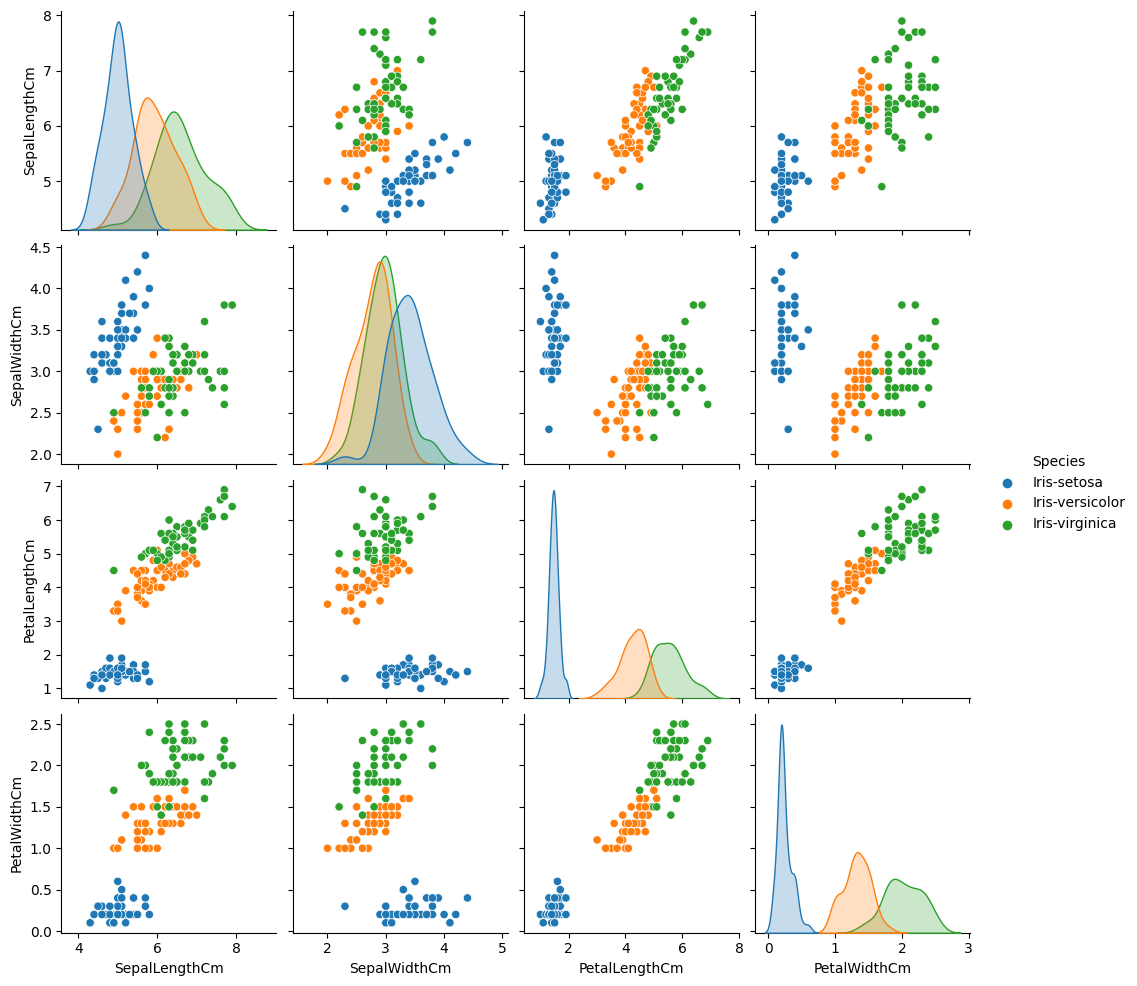

In [ ]:
import seaborn as sns

sns.pairplot(iris_df, hue='Species')

Pueden explorar este [notebook](https://www.kaggle.com/code/benhamner/python-data-visualizations) de kaggle, que usa este mismo dataset, para ver una gran variedad de graficos posibles

## Entrenamiento del modelo

Como vieron en clases, los pasos a seguir tipicos para entrenar un modelo con sklearn son los siguientes:



1.   Elegir el modelo adecuado, importando la clase correspondiente
2.   Obtener o generar matriz `X` y vector `y`
3.   Entrenar al modelo llamando a `fit(X, y)`
4.   Aplicar el modelo al set de test, usando el metodo `predict()`



### 1.   Elegir el modelo adecuado, importando la clase correspondiente

Debemos elegir un modelo de aprendizaje supervisado. Algunos ejemplos pueden ser regresion logistica, support vector machine, decision tree classifier, k-nearest neighbors. En este ejemplo usaremos regresion logistica:

In [ ]:
from sklearn.linear_model import LogisticRegression

### 2.   Obtener o generar matriz `X` y vector `y`

Dividimos en `dataframe` en `X`, en este caso las columnas de medida de la planta, y en `y`, lo que se quiere predecir, en este caso la columna de especie de la planta:

In [ ]:
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']

### 2.5 Dividir el dataset en training set y testing set

Este paso no esta explicito en el resumen, pero es muy importante. Como dice el paso 4. necesitamos un set de test para evaluar el rendimiento de nuestro modelo con datos distintos a los usados para el entrenamiento, es decir, datos que el modelo nunca ha visto. Para ello, del dataset completo tomamos un porcentaje (un valor tipico es 20%) para dejarlo como set de test. Usamos la funcion `train_test_split` que nos facilita sklearn, con la siguiente sintaxis:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Podemos ver que la funcion, convenientemente, mantiene mas o menos la proporcion de las especies:

In [ ]:
y_train.value_counts()

Iris-setosa        42
Iris-versicolor    39
Iris-virginica     39
Name: Species, dtype: int64

### 3.   Entrenar al modelo llamando a `fit(X, y)`

Ahora si, creamos el modelo con el `LogisticRegression` anteriormente importado y lo entrenamos con el set de entrenamiento

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

### 4.   Aplicar el modelo al set de test, usando el metodo `predict()`

Le pasamos al modelo entrenado nuestro set de test

In [ ]:
y_pred = model.predict(X_test)

Como mencione anteriormente, lo importante de este paso es evaluar el rendimiento del modelo. De esta forma, lo que queremos es ver que tanto se parecen las predicciones `y_pred` del modelo a los valores reales `y_test`. Como vieron en clases, para esto hay varias metricas como *accuracy*, *precission* y *recall*. Algunas podran ser de mas utilidad segun lo que se este buscando evaluar. En este caso usaremos *accuracy* que es una metrica bastante general para ver que tan bien esta prediciendo el modelo, ya que simplemente mide la tasa de aciertos

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9666666666666667

De esta forma, se obtiene un modelo capaz de recibir algunos datos de las medidas de cierta planta y predecir su especie con un alto accuracy.

Una pregunta final es: ¿basta con un accuracy alto para decir que un modelo es bueno?

¿Puedes imaginarte un modelo con un accuracy alto, pero que tenga un poder predictivo muy malo? (Spoiler: [sí](https://stats.stackexchange.com/questions/312780/why-is-accuracy-not-the-best-measure-for-assessing-classification-models))

Son muy relevantes las métricas que se usan al momento de definir si un modelo es realmente capaz de predecir algo o no. Te invitamos a pensar en los casos extremos y cómo el tener una variedad de métricas para los resultados nos ayuda a entender mejor nuestros modelos.